<a href="https://colab.research.google.com/github/freakezoide/codigos-de-coolab/blob/main/Presos_desde_el_2016_al_2018_RL_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Cargando datos para el año 2016...

=== ANÁLISIS PARA EL AÑO 2016 ===

Estadísticas descriptivas:
       PRESOSS  PRESOCS  PRESOPEN
count    70.00    70.00     52.00
mean     91.53    16.50     72.88
std      61.20    17.11    204.68
min      11.00     0.00      2.00
25%      39.00     6.00      9.00
50%      84.50    12.50     20.50
75%     127.50    20.00     44.75
max     336.00    98.00   1144.00

Totales:
PRESOSS     6407.0
PRESOCS     1155.0
PRESOPEN    3790.0
dtype: float64


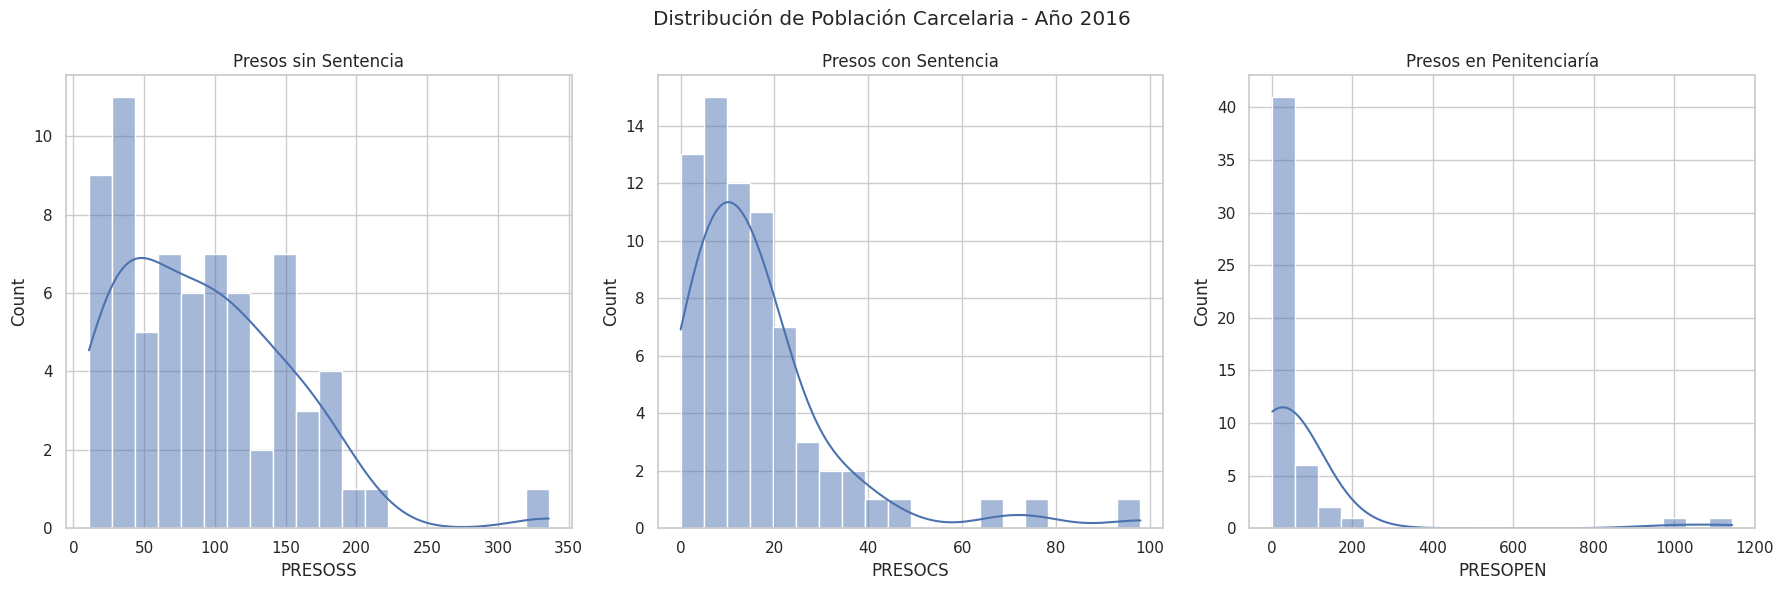


Matriz de correlación:
           PRESOSS   PRESOCS  PRESOPEN
PRESOSS   1.000000  0.632283  0.563387
PRESOCS   0.632283  1.000000  0.877927
PRESOPEN  0.563387  0.877927  1.000000


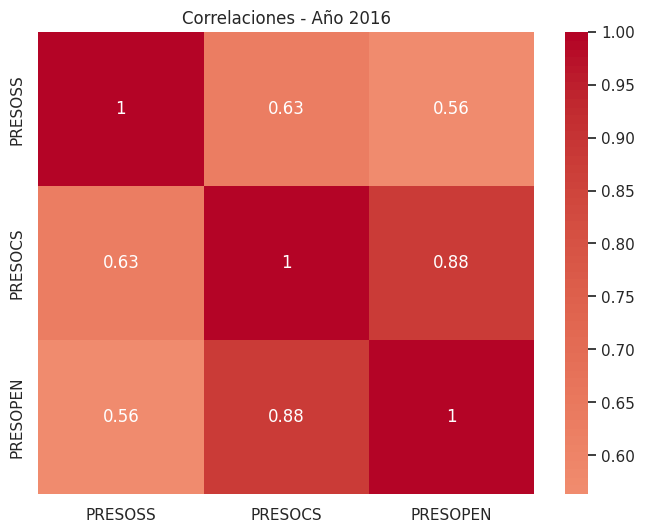


Cargando datos para el año 2017...

=== ANÁLISIS PARA EL AÑO 2017 ===

Estadísticas descriptivas:
       PRESOSS  PRESOCS  PRESOPEN
count   100.00   100.00     76.00
mean     72.75    13.73     53.55
std     100.89    18.78    174.60
min       0.00     0.00      0.00
25%      14.75     2.00      5.00
50%      39.00     7.00     11.00
75%      79.25    18.00     22.25
max     625.00    94.00   1169.00

Totales:
PRESOSS     7275.0
PRESOCS     1373.0
PRESOPEN    4070.0
dtype: float64


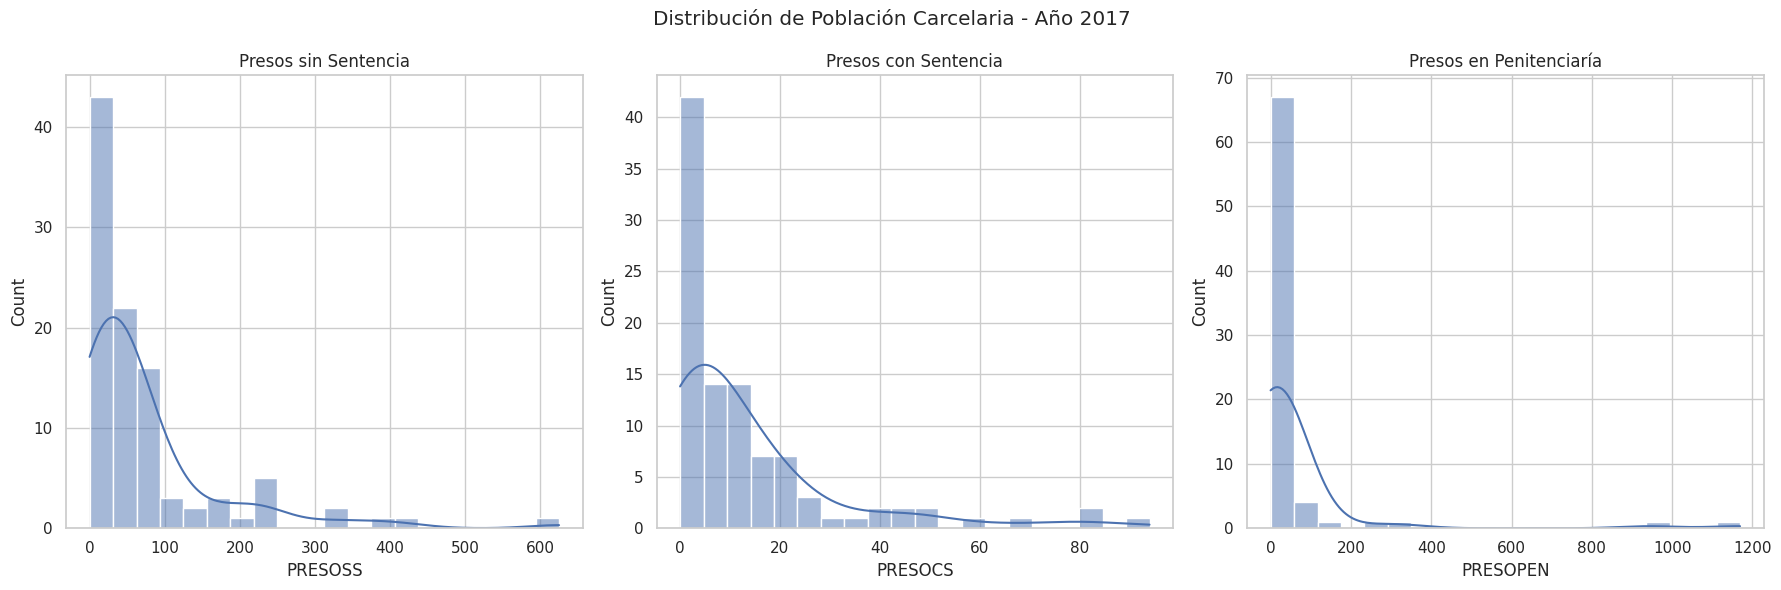


Matriz de correlación:
           PRESOSS   PRESOCS  PRESOPEN
PRESOSS   1.000000  0.694101  0.693350
PRESOCS   0.694101  1.000000  0.479553
PRESOPEN  0.693350  0.479553  1.000000


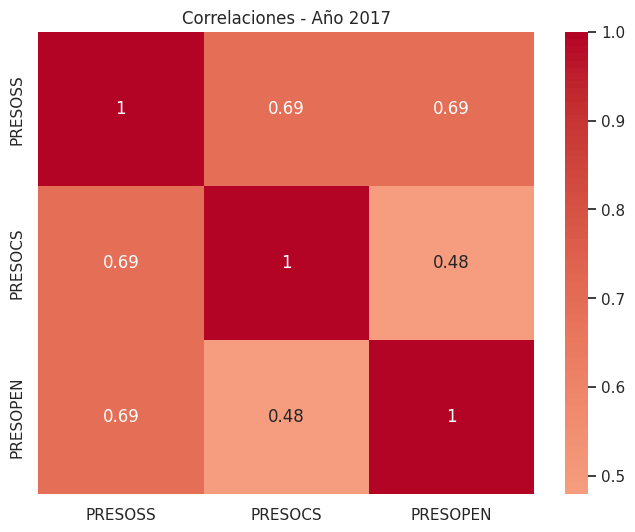


Cargando datos para el año 2018...

=== ANÁLISIS PARA EL AÑO 2018 ===

Estadísticas descriptivas:
       PRESOSS  PRESOCS  PRESOPEN
count    68.00    68.00     96.00
mean     25.66     4.72     48.61
std      42.71     5.62    150.60
min       0.00     0.00      0.00
25%       4.00     1.00      0.00
50%       9.00     3.50      4.00
75%      25.50     7.00     15.00
max     266.00    27.00    800.00

Totales:
PRESOSS     1745.0
PRESOCS      321.0
PRESOPEN    4667.0
dtype: float64


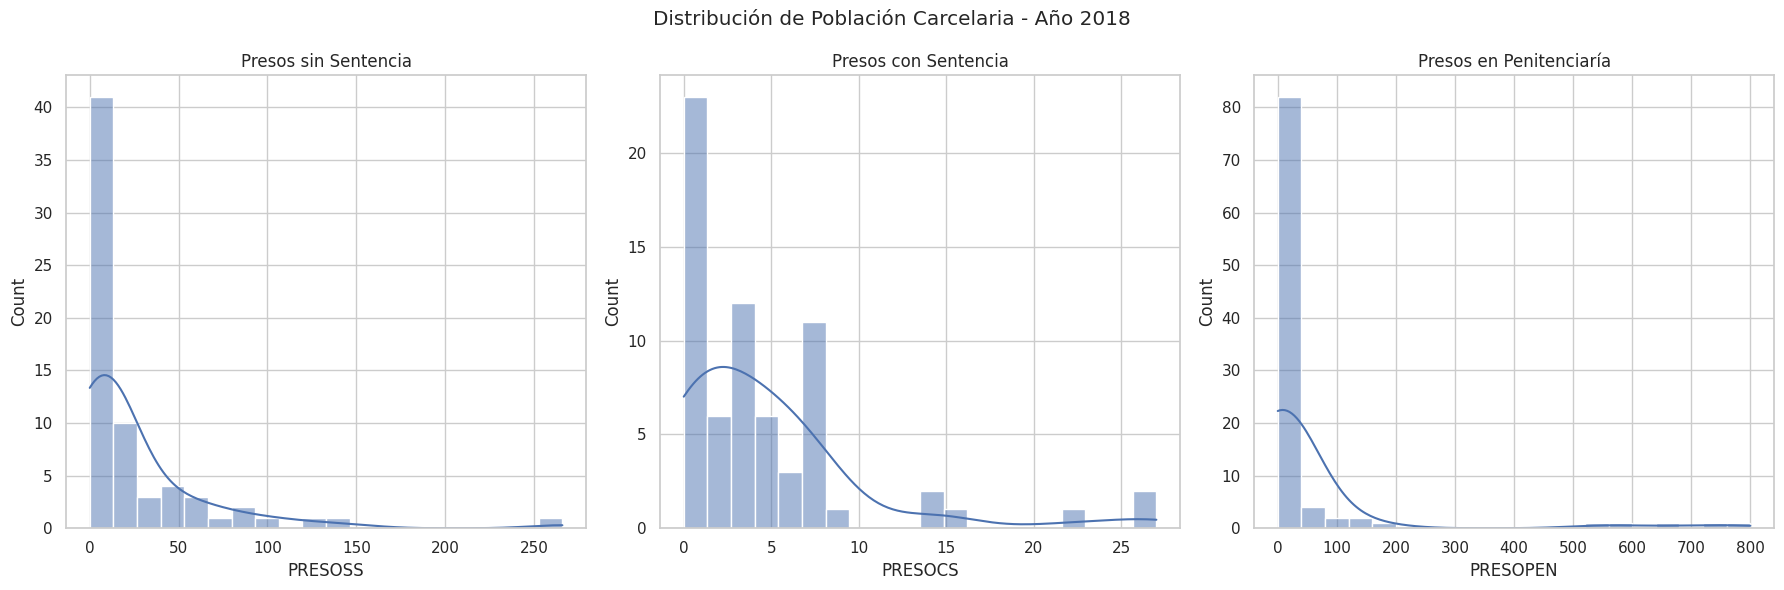


Matriz de correlación:
           PRESOSS   PRESOCS  PRESOPEN
PRESOSS   1.000000  0.566739  0.139655
PRESOCS   0.566739  1.000000  0.496500
PRESOPEN  0.139655  0.496500  1.000000


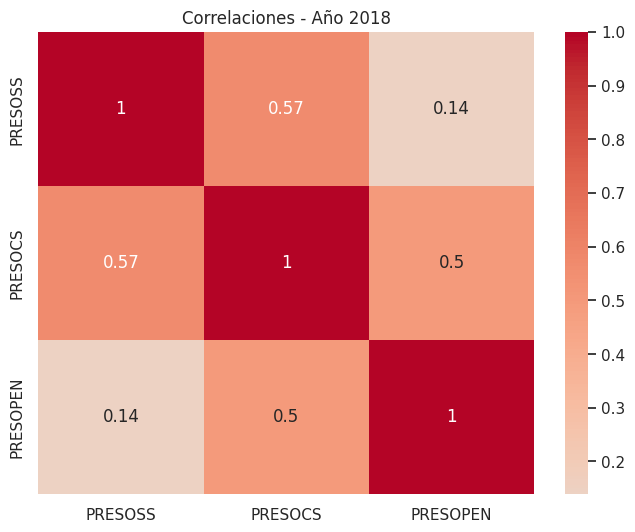

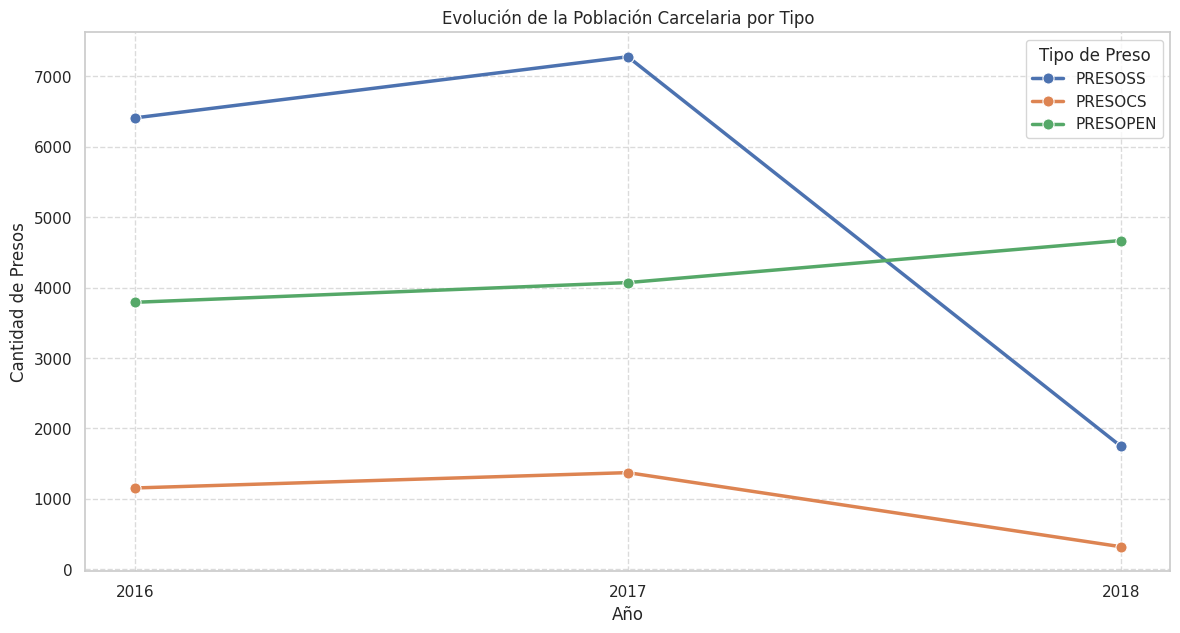


Variación porcentual anual:
      PRESOSS  PRESOCS  PRESOPEN
AÑO                             
2016      NaN      NaN       NaN
2017    13.55    18.87      7.39
2018   -76.01   -76.62     14.67

=== ANÁLISIS DE REGRESIÓN LINEAL ===

** PRESOSS **
Coeficiente (pendiente): -2331.00
Intercepto: 4706769.33
R²: 0.6143

** PRESOCS **
Coeficiente (pendiente): -417.00
Intercepto: 842038.67
R²: 0.5640

** PRESOPEN **
Coeficiente (pendiente): 438.50
Intercepto: -880278.83
R²: 0.9583


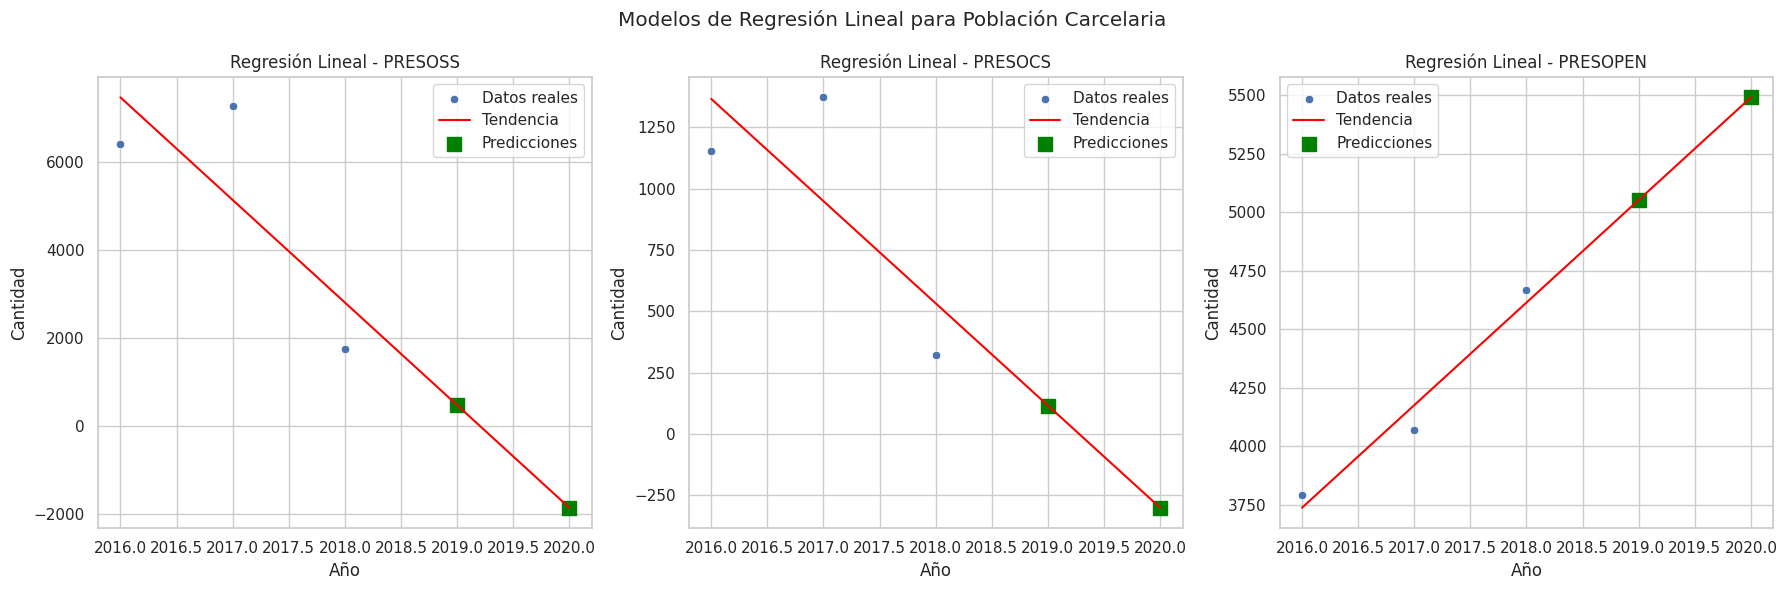

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from glob import glob
from sklearn.linear_model import LinearRegression
import numpy as np

# Configuración estética
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

def cargar_datos_anuales(archivo, año):
    """
    Carga datos de un año específico con manejo de encoding y limpieza básica
    """
    try:
        df = pd.read_csv(archivo, sep=';', encoding='latin-1', thousands='.', decimal=',')
        df['AÑO'] = año  # Agregamos columna de año
        return df
    except Exception as e:
        print(f"Error al cargar {archivo}: {str(e)}")
        return None

def analizar_datos(df, año):
    """
    Realiza análisis básicos y genera visualizaciones para un año específico
    """
    print(f"\n=== ANÁLISIS PARA EL AÑO {año} ===\n")

    # Estadísticas descriptivas
    print("Estadísticas descriptivas:")
    print(df[['PRESOSS', 'PRESOCS', 'PRESOPEN']].describe().round(2))

    # Totales
    print("\nTotales:")
    print(df[['PRESOSS', 'PRESOCS', 'PRESOPEN']].sum())

    # Visualizaciones
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f'Distribución de Población Carcelaria - Año {año}')

    sns.histplot(df['PRESOSS'], bins=20, kde=True, ax=axes[0])
    axes[0].set_title('Presos sin Sentencia')

    sns.histplot(df['PRESOCS'], bins=20, kde=True, ax=axes[1])
    axes[1].set_title('Presos con Sentencia')

    sns.histplot(df['PRESOPEN'], bins=20, kde=True, ax=axes[2])
    axes[2].set_title('Presos en Penitenciaría')

    plt.tight_layout()
    plt.show()

    # Correlaciones
    print("\nMatriz de correlación:")
    corr_matrix = df[['PRESOSS', 'PRESOCS', 'PRESOPEN']].corr()
    print(corr_matrix)

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlaciones - Año {año}')
    plt.show()

def realizar_regresion_lineal(df_evolucion):
    """
    Realiza regresión lineal para predecir la evolución de cada tipo de población carcelaria
    """
    print("\n=== ANÁLISIS DE REGRESIÓN LINEAL ===")

    # Preparar datos para regresión
    X = df_evolucion['AÑO'].values.reshape(-1, 1)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('Modelos de Regresión Lineal para Población Carcelaria')

    for i, col in enumerate(['PRESOSS', 'PRESOCS', 'PRESOPEN']):
        y = df_evolucion[col].values

        # Crear y entrenar modelo
        model = LinearRegression()
        model.fit(X, y)

        # Predecir para los años existentes y 2 años más
        X_pred = np.array(list(df_evolucion['AÑO']) + [max(df_evolucion['AÑO'])+1, max(df_evolucion['AÑO'])+2]).reshape(-1, 1)
        y_pred = model.predict(X_pred)

        # Mostrar resultados
        print(f"\n** {col} **")
        print(f"Coeficiente (pendiente): {model.coef_[0]:.2f}")
        print(f"Intercepto: {model.intercept_:.2f}")
        print(f"R²: {model.score(X, y):.4f}")

        # Visualización
        ax = axes[i]
        sns.scatterplot(x=df_evolucion['AÑO'], y=y, ax=ax, label='Datos reales')
        sns.lineplot(x=X_pred.flatten(), y=y_pred, ax=ax, color='red', label='Tendencia')

        # Marcar predicciones futuras
        future_years = X_pred.flatten()[-2:]
        future_preds = y_pred[-2:]
        ax.scatter(future_years, future_preds, color='green', s=100, label='Predicciones', marker='s')

        ax.set_title(f'Regresión Lineal - {col}')
        ax.set_xlabel('Año')
        ax.set_ylabel('Cantidad')
        ax.legend()
        ax.grid(True)

    plt.tight_layout()
    plt.show()

    return model

def analizar_evolucion_temporal(lista_dfs):
    """
    Analiza la evolución temporal comparando múltiples años
    """
    # Combinar todos los datos en un solo DataFrame
    df_completo = pd.concat(lista_dfs, ignore_index=True)

    # Agrupar por año y calcular totales
    df_evolucion = df_completo.groupby('AÑO')[['PRESOSS', 'PRESOCS', 'PRESOPEN']].sum().reset_index()

    # Visualización de evolución
    plt.figure(figsize=(14, 7))
    df_evolucion_melt = df_evolucion.melt(id_vars='AÑO', var_name='Tipo', value_name='Cantidad')

    sns.lineplot(data=df_evolucion_melt, x='AÑO', y='Cantidad', hue='Tipo',
                 marker='o', markersize=8, linewidth=2.5)

    plt.title('Evolución de la Población Carcelaria por Tipo')
    plt.ylabel('Cantidad de Presos')
    plt.xlabel('Año')
    plt.xticks(df_evolucion['AÑO'].unique())
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Tipo de Preso')
    plt.show()

    # Cálculo de variaciones porcentuales
    df_variacion = df_evolucion.set_index('AÑO').pct_change() * 100
    print("\nVariación porcentual anual:")
    print(df_variacion.round(2))

    # Realizar regresión lineal
    realizar_regresion_lineal(df_evolucion)

def main():
    # Diccionario para mapear años a archivos (modificar según tus archivos)
    archivos_por_año = {
        2016: 'microdatos_presos_2016.csv',
        2017: 'microdatos_presos_2017.csv',  # Ejemplo - agregar archivos reales
        2018: 'microdatos_presos_2018.csv'   # Ejemplo - agregar archivos reales
    }

    # Cargar datos para cada año disponible
    datos_anuales = []
    for año, archivo in archivos_por_año.items():
        if os.path.exists(archivo):
            print(f"\nCargando datos para el año {año}...")
            df = cargar_datos_anuales(archivo, año)
            if df is not None:
                datos_anuales.append(df)
                analizar_datos(df, año)
            else:
                print(f"No se pudo cargar datos para {año}")
        else:
            print(f"Archivo no encontrado para el año {año}: {archivo}")

    # Si tenemos datos de múltiples años, hacer análisis temporal
    if len(datos_anuales) > 1:
        analizar_evolucion_temporal(datos_anuales)
    else:
        print("\nNo hay suficientes años para analizar evolución temporal")

if __name__ == "__main__":
    main()